### Import dữ liệu

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("META.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3235 non-null   object 
 1   Open    3235 non-null   float64
 2   High    3235 non-null   float64
 3   Low     3235 non-null   float64
 4   Close   3235 non-null   float64
 5   Volume  3235 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 151.8+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,3235.000000,3235.000000,3235.000000,3235.000000,3.235000e+03
mean,193.443694,195.943246,190.956360,193.502589,2.909967e+07
std,143.066907,144.874230,141.119185,143.033983,2.560959e+07
min,18.011199,18.200477,17.483216,17.662531,4.726100e+06
25%,89.836829,90.872874,88.790826,90.145649,1.539615e+07
50%,166.733080,168.805154,164.561384,167.041885,2.153170e+07
75%,259.752764,264.295407,256.734303,260.335510,3.319535e+07
max,736.000000,740.909973,725.619995,736.669983,5.735764e+08


### Trực quan hóa các cột giá trị có trong data 

In [104]:
# df.set_index('Date', inplace=True)
# df['Date'] = pd.to_datetime(df['Date'], format = '%y-%m-%d')

<Axes: title={'center': 'close'}>

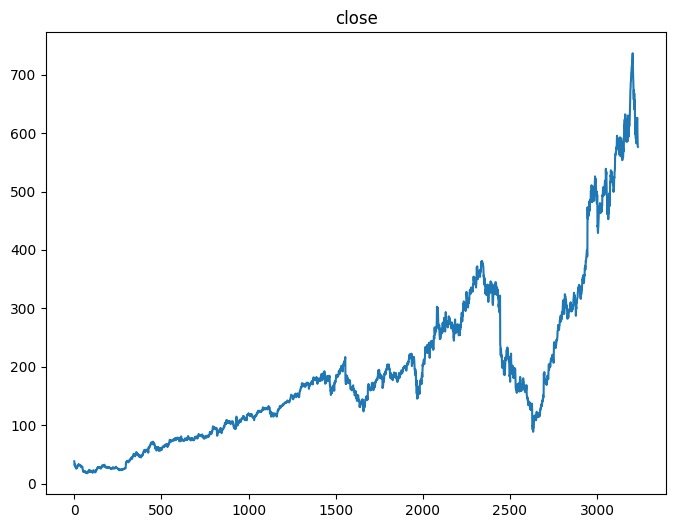

In [5]:
df['Close'].plot(label='meta stock price data', figsize=(8,6), title ='close')

### Dự đoán giá cổ phiếu
Dùng dữ liệu từ ngày 18/05/2022 đến ngày 29/07/2022 để dự đoán giá cổ phiếu từ ngày 01/08/2022 đến ngày 19/02/2025

In [6]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    print(f"R^2 Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")

In [7]:
data_train = df[:2566].copy()
data_test = df[2566:].copy()

In [8]:
X_train = data_train[['Volume', 'High', 'Low', 'Open']]
y_train = data_train['Close'].values

X_test = data_test[['Volume', 'High', 'Low', 'Open']] 
y_test = data_test['Close'].values


In [9]:
from sklearn.linear_model import LinearRegression
clfreg = LinearRegression()
clfreg.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = clfreg.predict(X_test)

evaluate_model(y_test, y_pred)


R^2 Score: 0.9997
MSE: 9.0265
MAE: 2.2003
RMSE: 3.0044
MAPE: 0.64%


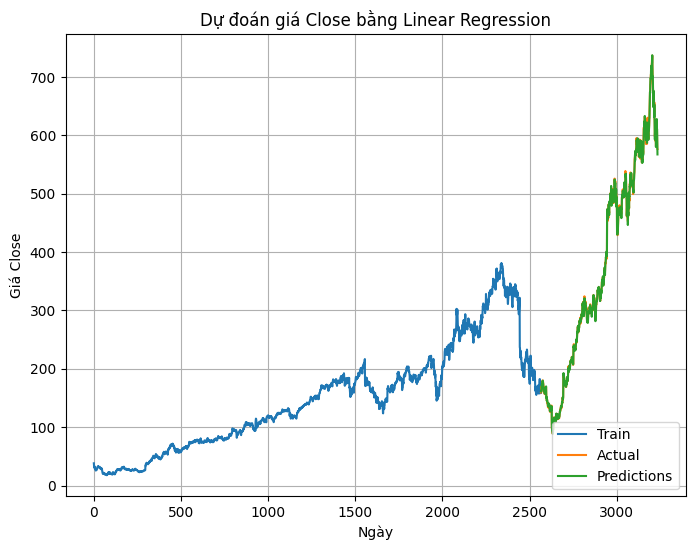

In [11]:
plt.figure(figsize=(8, 6))

data_test = data_test.copy()
data_test['Predictions'] = y_pred

plt.plot(data_train['Close'], label='Train')
plt.plot(data_test['Close'], label='Actual')
plt.plot(data_test['Predictions'], label='Predictions')


plt.legend(loc='lower right')
plt.title("Dự đoán giá Close bằng Linear Regression")
plt.xlabel("Ngày")
plt.ylabel("Giá Close")
plt.grid(True)
plt.show()

### Dự đoán xu hướng giá cổ phiếu
Dùng dữ liệu từ ngày 18/05/2022 đến ngày 29/07/2022 để dự đoán giá đóng cửa tăng hay giảm từ ngày 01/08/2022 đến ngày 19/02/2025

In [12]:
n = 30
# So sánh giá của ngày hôm nay so với ngày mai
df['Target'] = (df['Close'] < df['Close'].shift(-n)).astype(int) 
df.dropna(inplace=True)

In [13]:
df = df.iloc[:-30]

In [14]:
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Target']

X_with_intercept = sm.add_constant(X)

In [15]:
model = sm.Logit(y, X_with_intercept)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650855
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 3205
Model:                          Logit   Df Residuals:                     3199
Method:                           MLE   Df Model:                            5
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:                0.001202
Time:                        22:29:35   Log-Likelihood:                -2086.0
converged:                       True   LL-Null:                       -2088.5
Covariance Type:            nonrobust   LLR p-value:                    0.4134
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5902      0.095      6.217      0.000       0.404       0.776
Open           0.0296      0.

In [16]:
data_train = df[:2565].copy()
data_test = df[2565:].copy()

Sử dụng Logistic Regression

In [17]:
X_train = data_train.drop(columns=['Target','Date']) 
y_train = data_train['Target'].values 

X_test = data_test.drop(columns=['Target','Date'])
y_test = data_test['Target'].values

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = LogisticRegression(C=0.001, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [20]:
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5938
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.48      0.40       177
           1       0.76      0.64      0.69       463

    accuracy                           0.59       640
   macro avg       0.55      0.56      0.54       640
weighted avg       0.64      0.59      0.61       640

